In [267]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
from collections import Counter
import missingno as msno

/var/folders/_b/1x9hj_s15m1c7h3jnj7x41mh0000gn/T/ipykernel_13802/2238687145.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [268]:
df=pd.read_csv("pokemon.csv")

In [304]:
df.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Charmander,Fire,0,309,39,52,43,60,50,65,1,0
4,Charmeleon,Fire,0,405,58,64,58,80,65,80,1,0
5,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,0
6,Squirtle,Water,0,314,44,48,65,50,64,43,1,0
7,Wartortle,Water,0,405,59,63,80,65,80,58,1,0
8,Blastoise,Water,0,530,79,83,100,85,105,78,1,0
9,Caterpie,Bug,0,195,45,30,35,20,20,45,1,0


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        742 non-null    object
 1   Type 1      742 non-null    object
 2   Type 2      742 non-null    object
 3   Total       742 non-null    int64 
 4   HP          742 non-null    int64 
 5   Attack      742 non-null    int64 
 6   Defense     742 non-null    int64 
 7   Sp. Atk     742 non-null    int64 
 8   Sp. Def     742 non-null    int64 
 9   Speed       742 non-null    int64 
 10  Generation  742 non-null    int64 
 11  Legendary   742 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 69.7+ KB


In [307]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,742.0,422.711590,111.899320,180.0,325.00,430.0,500.00,720.0
HP,742.0,68.699461,25.979645,1.0,50.00,65.0,80.00,255.0
Attack,742.0,75.803235,29.657225,5.0,55.00,75.0,95.00,180.0
Defense,742.0,71.439353,29.467766,5.0,50.00,67.0,89.75,230.0
Sp. Atk,742.0,70.113208,29.979536,10.0,45.25,65.0,90.00,180.0
Sp. Def,742.0,70.088949,27.308952,20.0,50.00,65.0,85.00,230.0
Speed,742.0,66.567385,27.899185,5.0,45.00,65.0,86.75,180.0
Generation,742.0,3.358491,1.660302,1.0,2.00,3.0,5.00,6.0
Legendary,742.0,0.076819,0.266484,0.0,0.00,0.0,0.00,1.0


In [308]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [309]:
df.rename(columns={'#': 'index'}, inplace=True)

In [338]:
## df = df.drop(columns=['index'])

In [ ]:
df.head()

In [ ]:
df['Legendary'] = df['Legendary'].astype(int)


In [ ]:
## Kategorık degereler 
##    Name
##    Type 1
##    Type 2      
## Numerık degıskenler 
#     Total
#     HP
#     Attack
#     defense
#     Sp. Atk
#     Sp. Def
#     Speed
#     Generation
#     Legendary

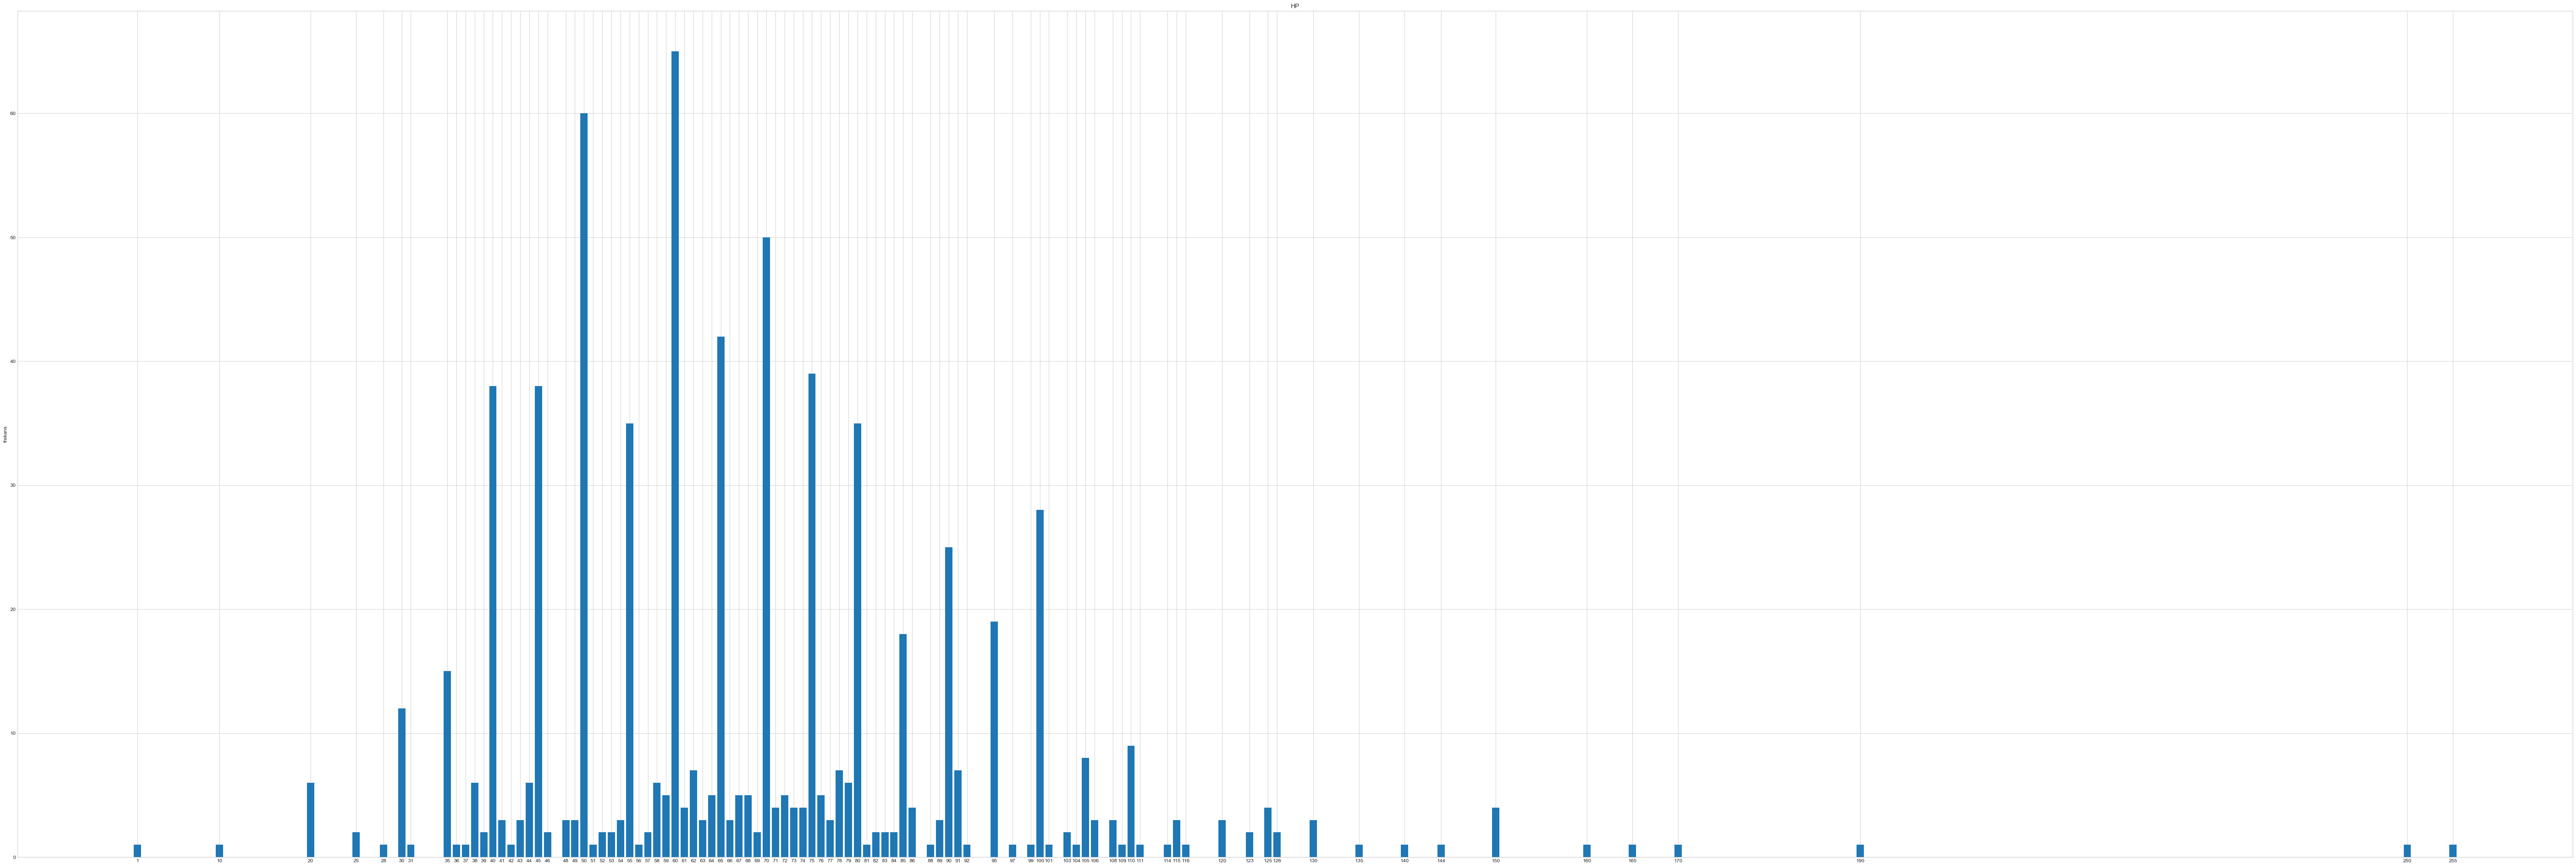

HP:
60     65
50     60
70     50
65     42
75     39
       ..
97      1
160     1
170     1
37      1
116     1
Name: HP, Length: 94, dtype: int64


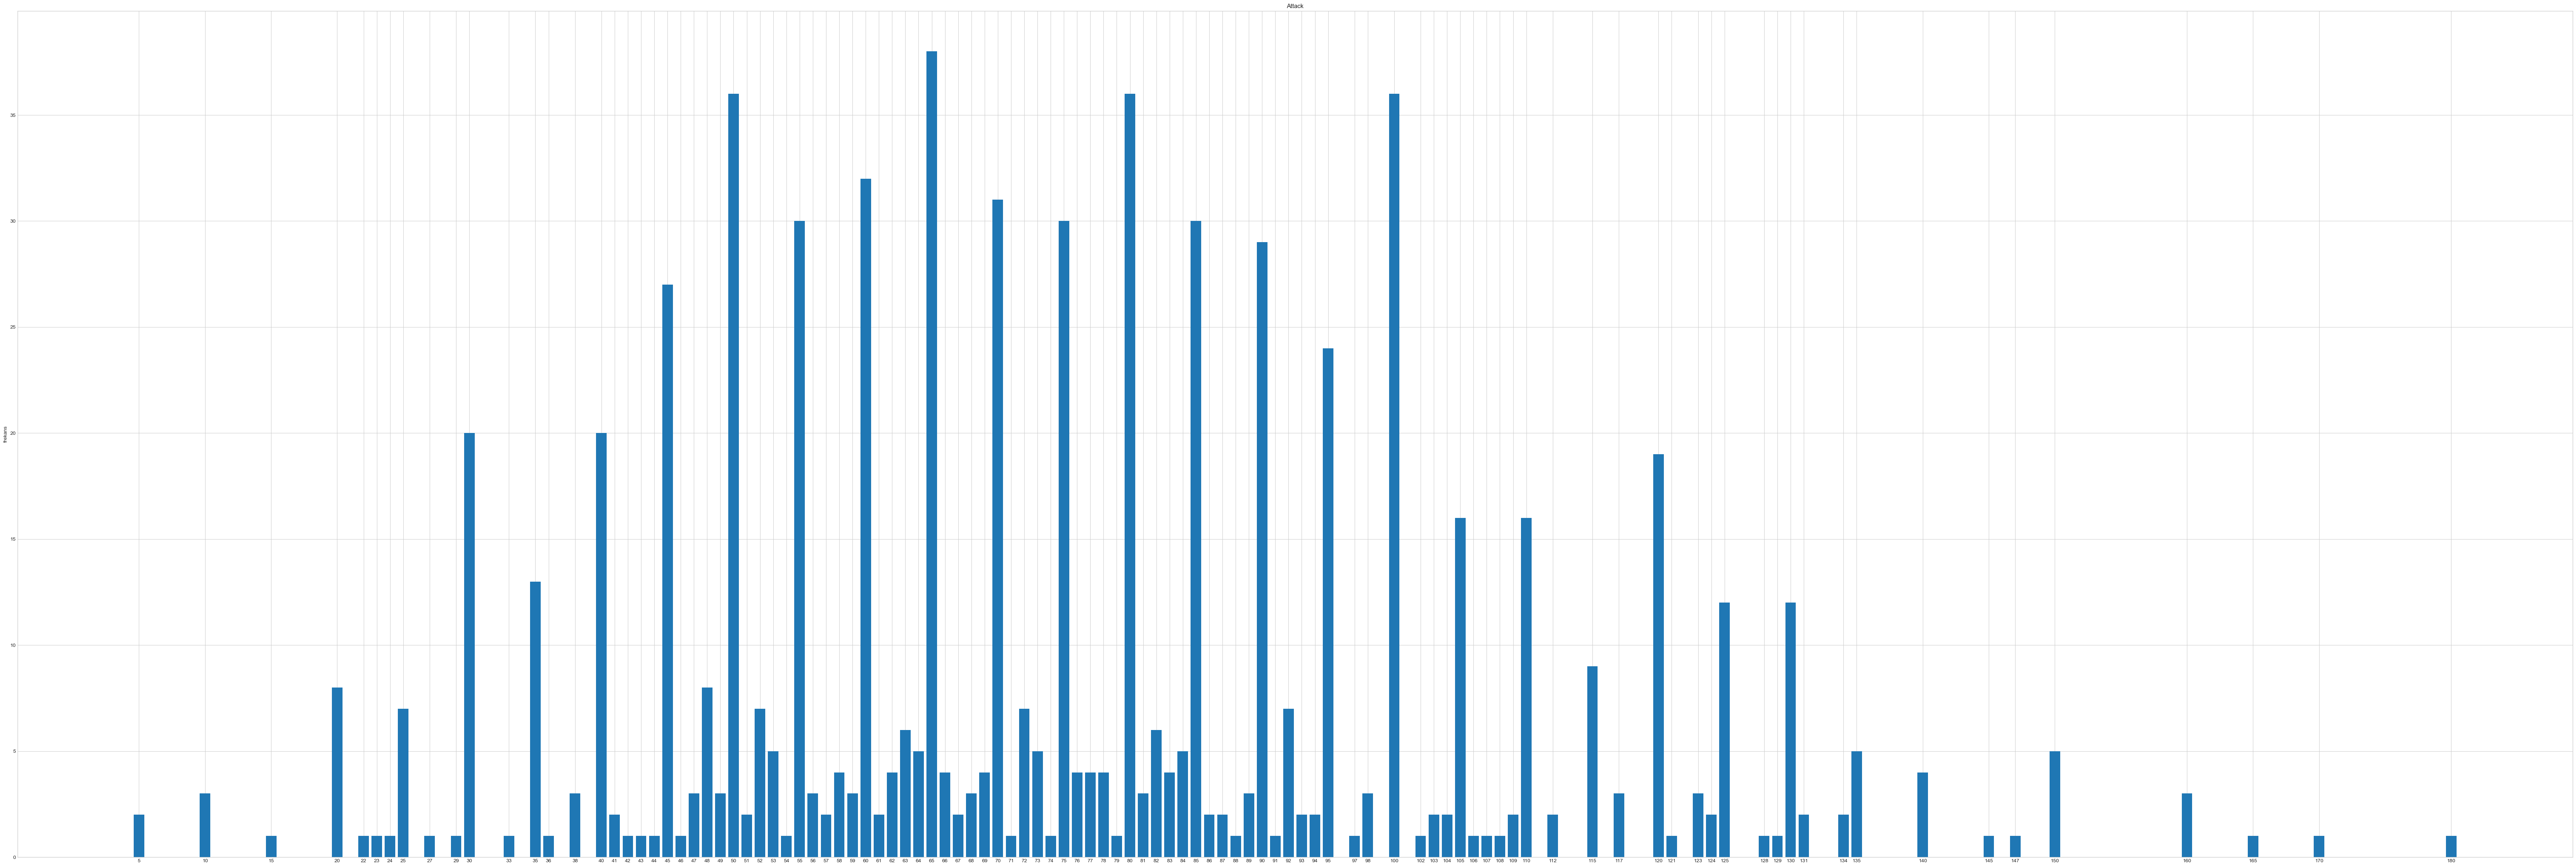

Attack:
65     38
100    36
50     36
80     36
60     32
       ..
106     1
91      1
43      1
24      1
71      1
Name: Attack, Length: 105, dtype: int64


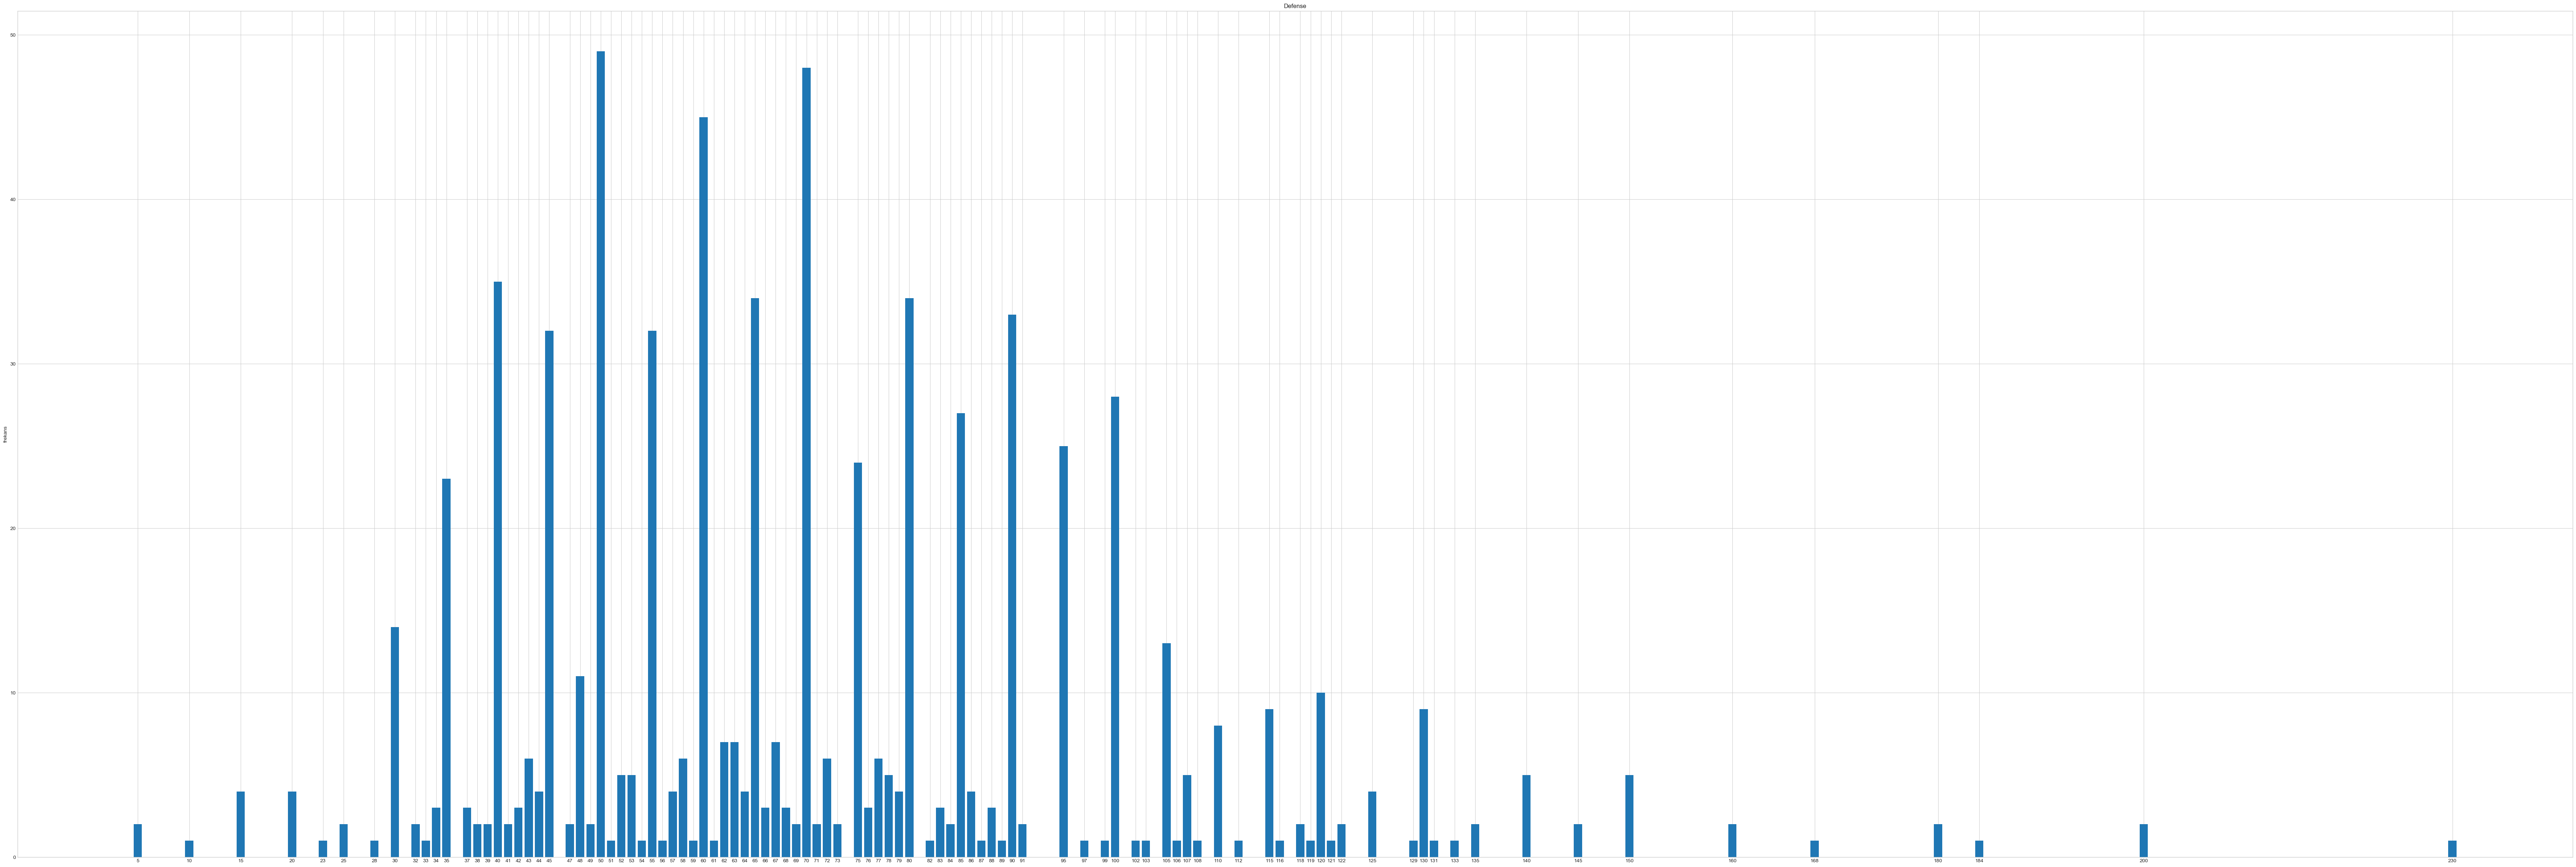

Defense:
50     49
70     48
60     45
40     35
65     34
       ..
168     1
10      1
51      1
61      1
121     1
Name: Defense, Length: 98, dtype: int64


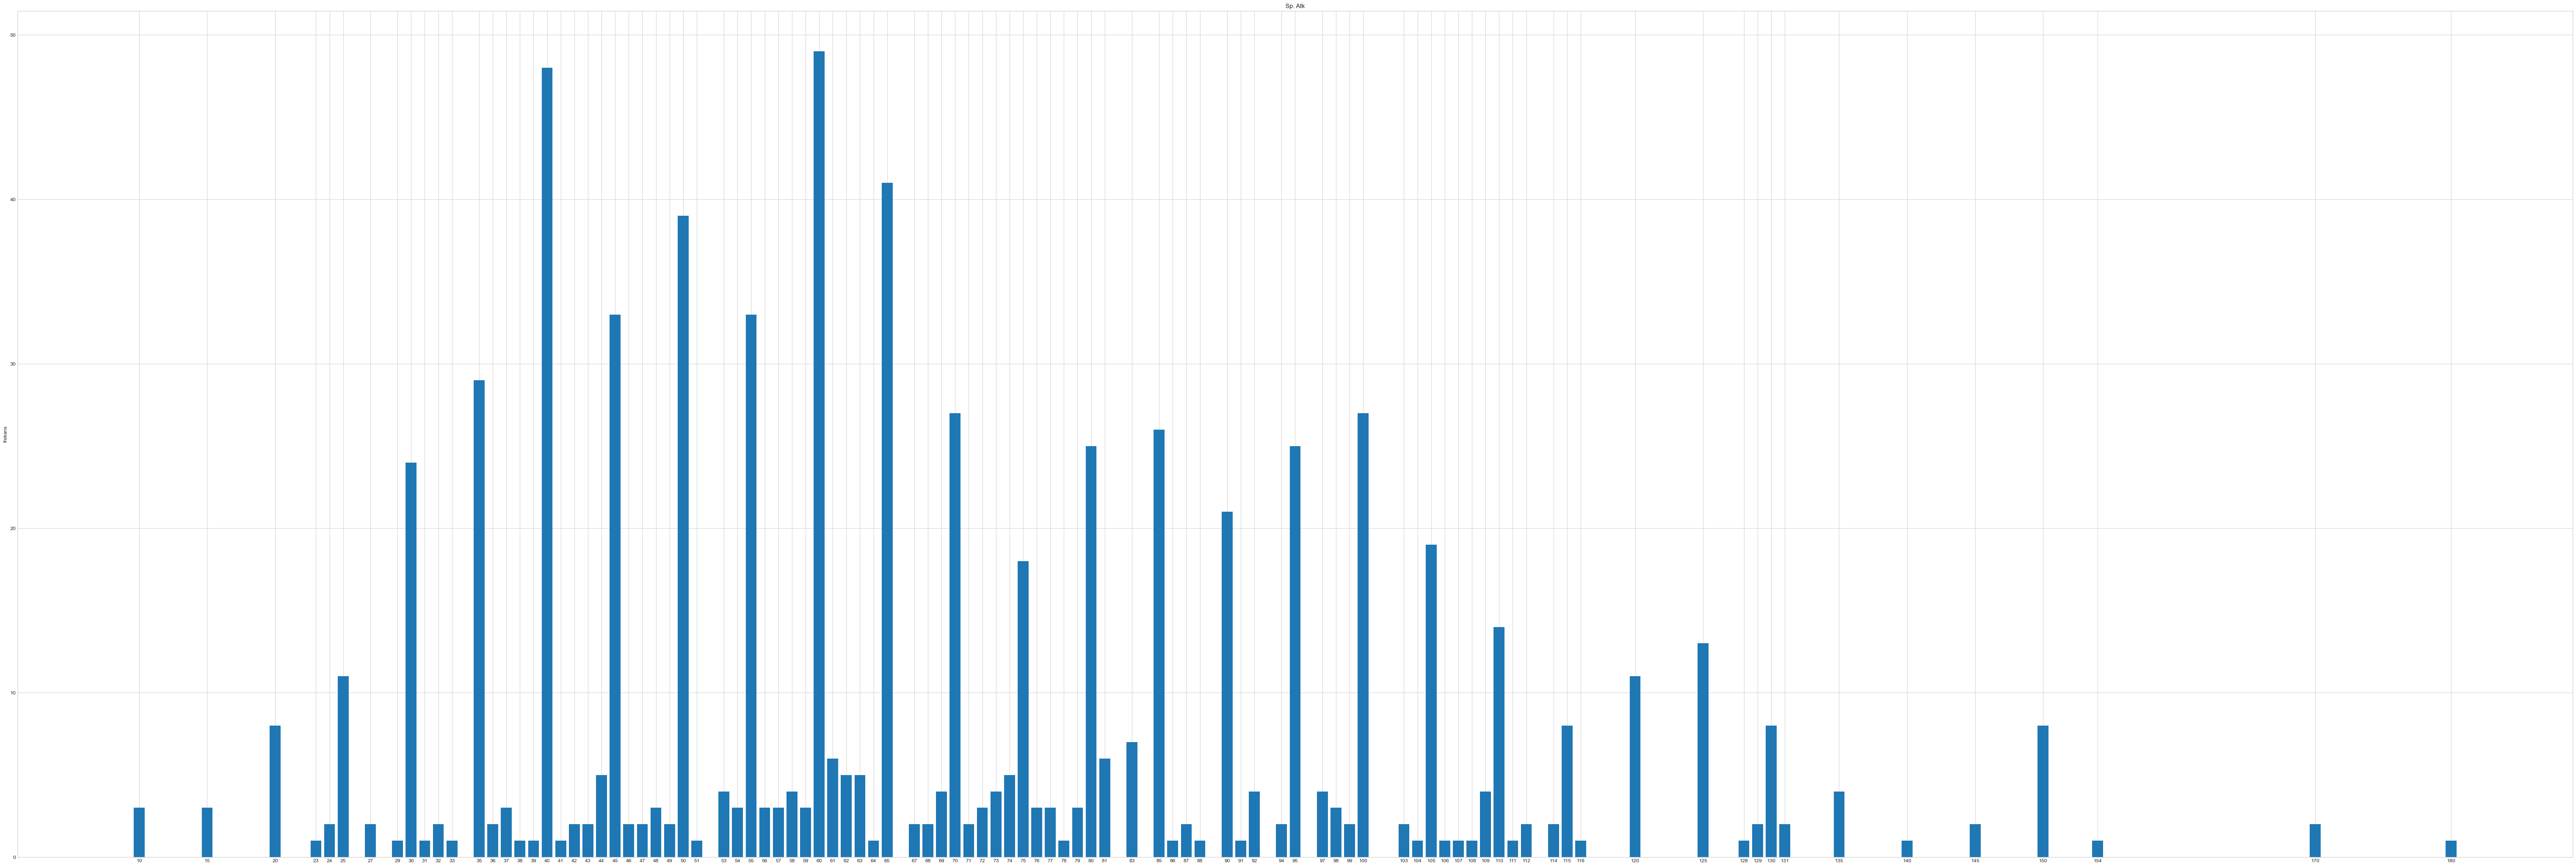

Sp. Atk:
60     49
40     48
65     41
50     39
55     33
       ..
104     1
41      1
64      1
111     1
91      1
Name: Sp. Atk, Length: 97, dtype: int64


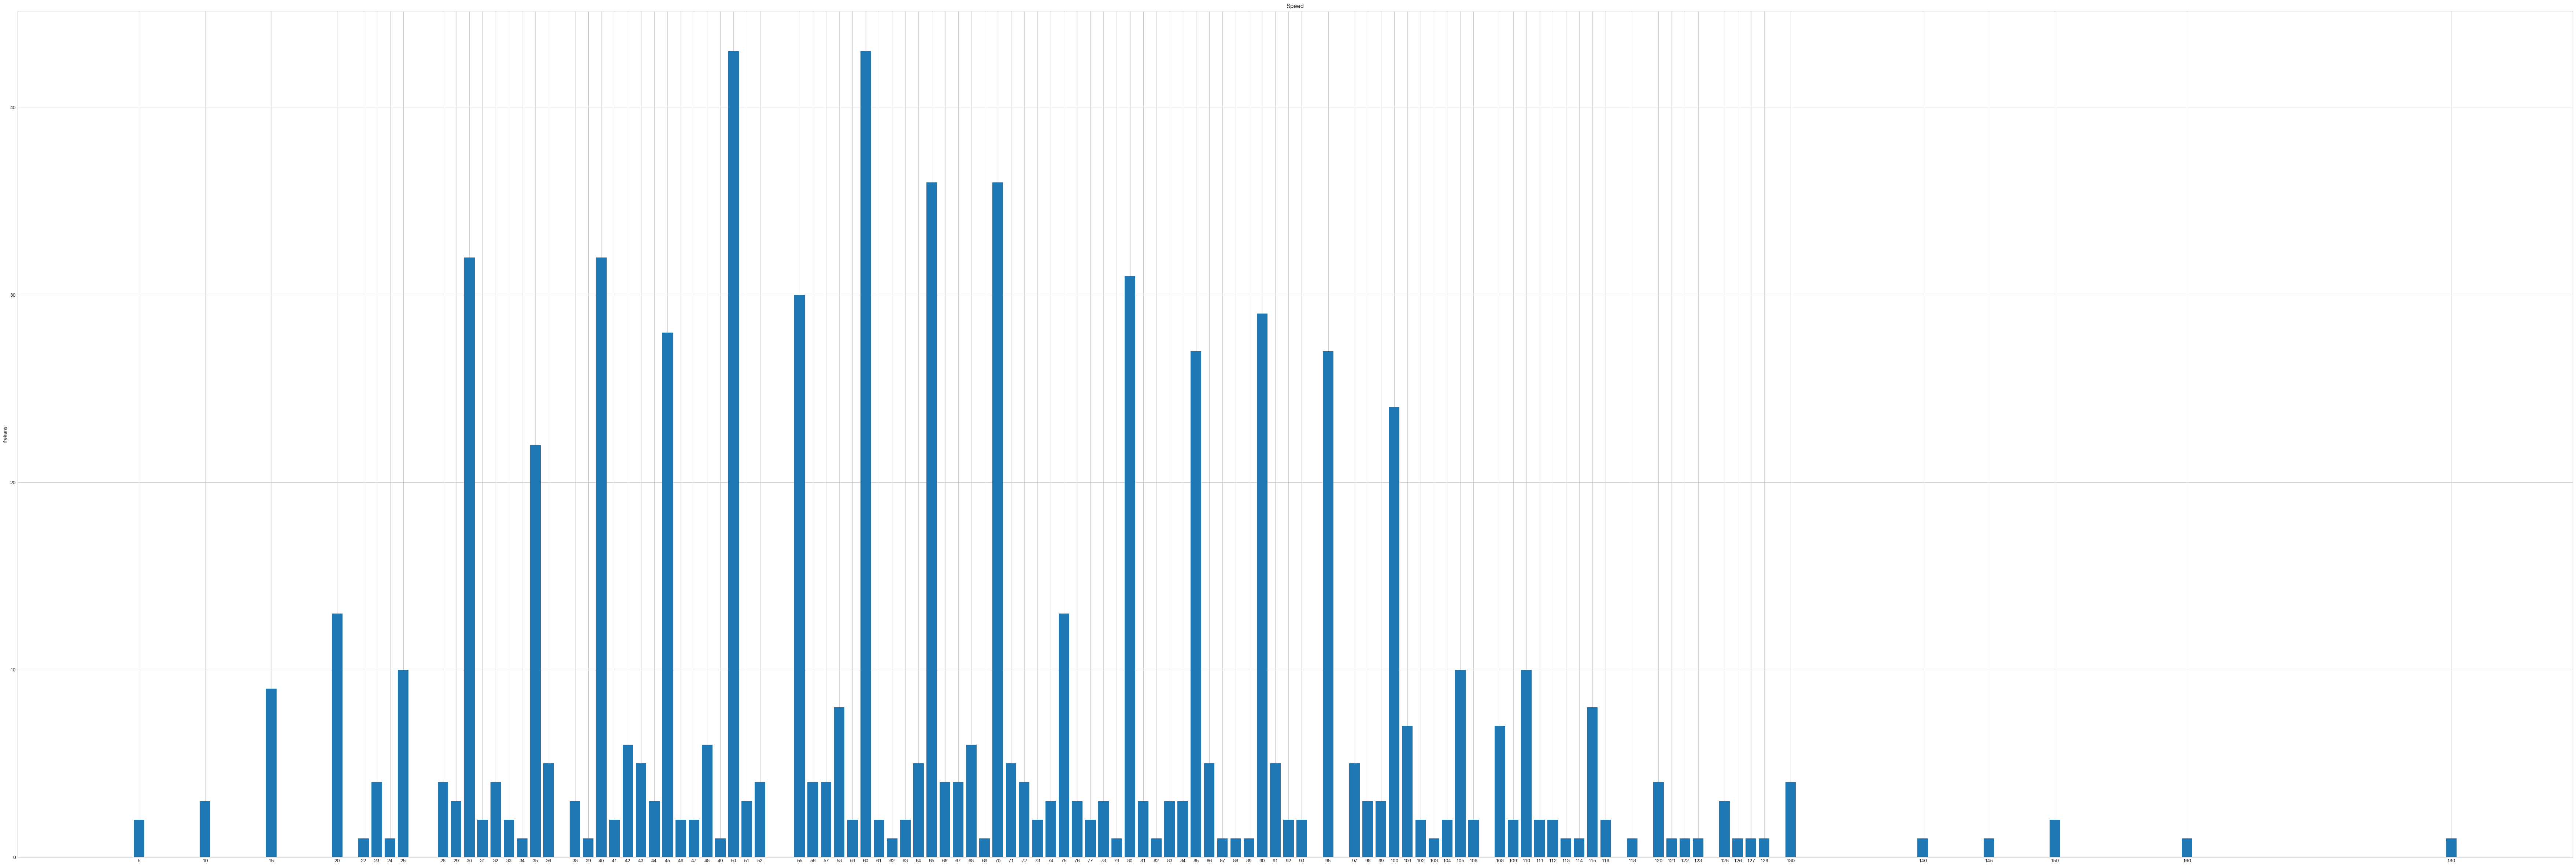

Speed:
60     43
50     43
70     36
65     36
30     32
       ..
180     1
140     1
87      1
160     1
123     1
Name: Speed, Length: 106, dtype: int64


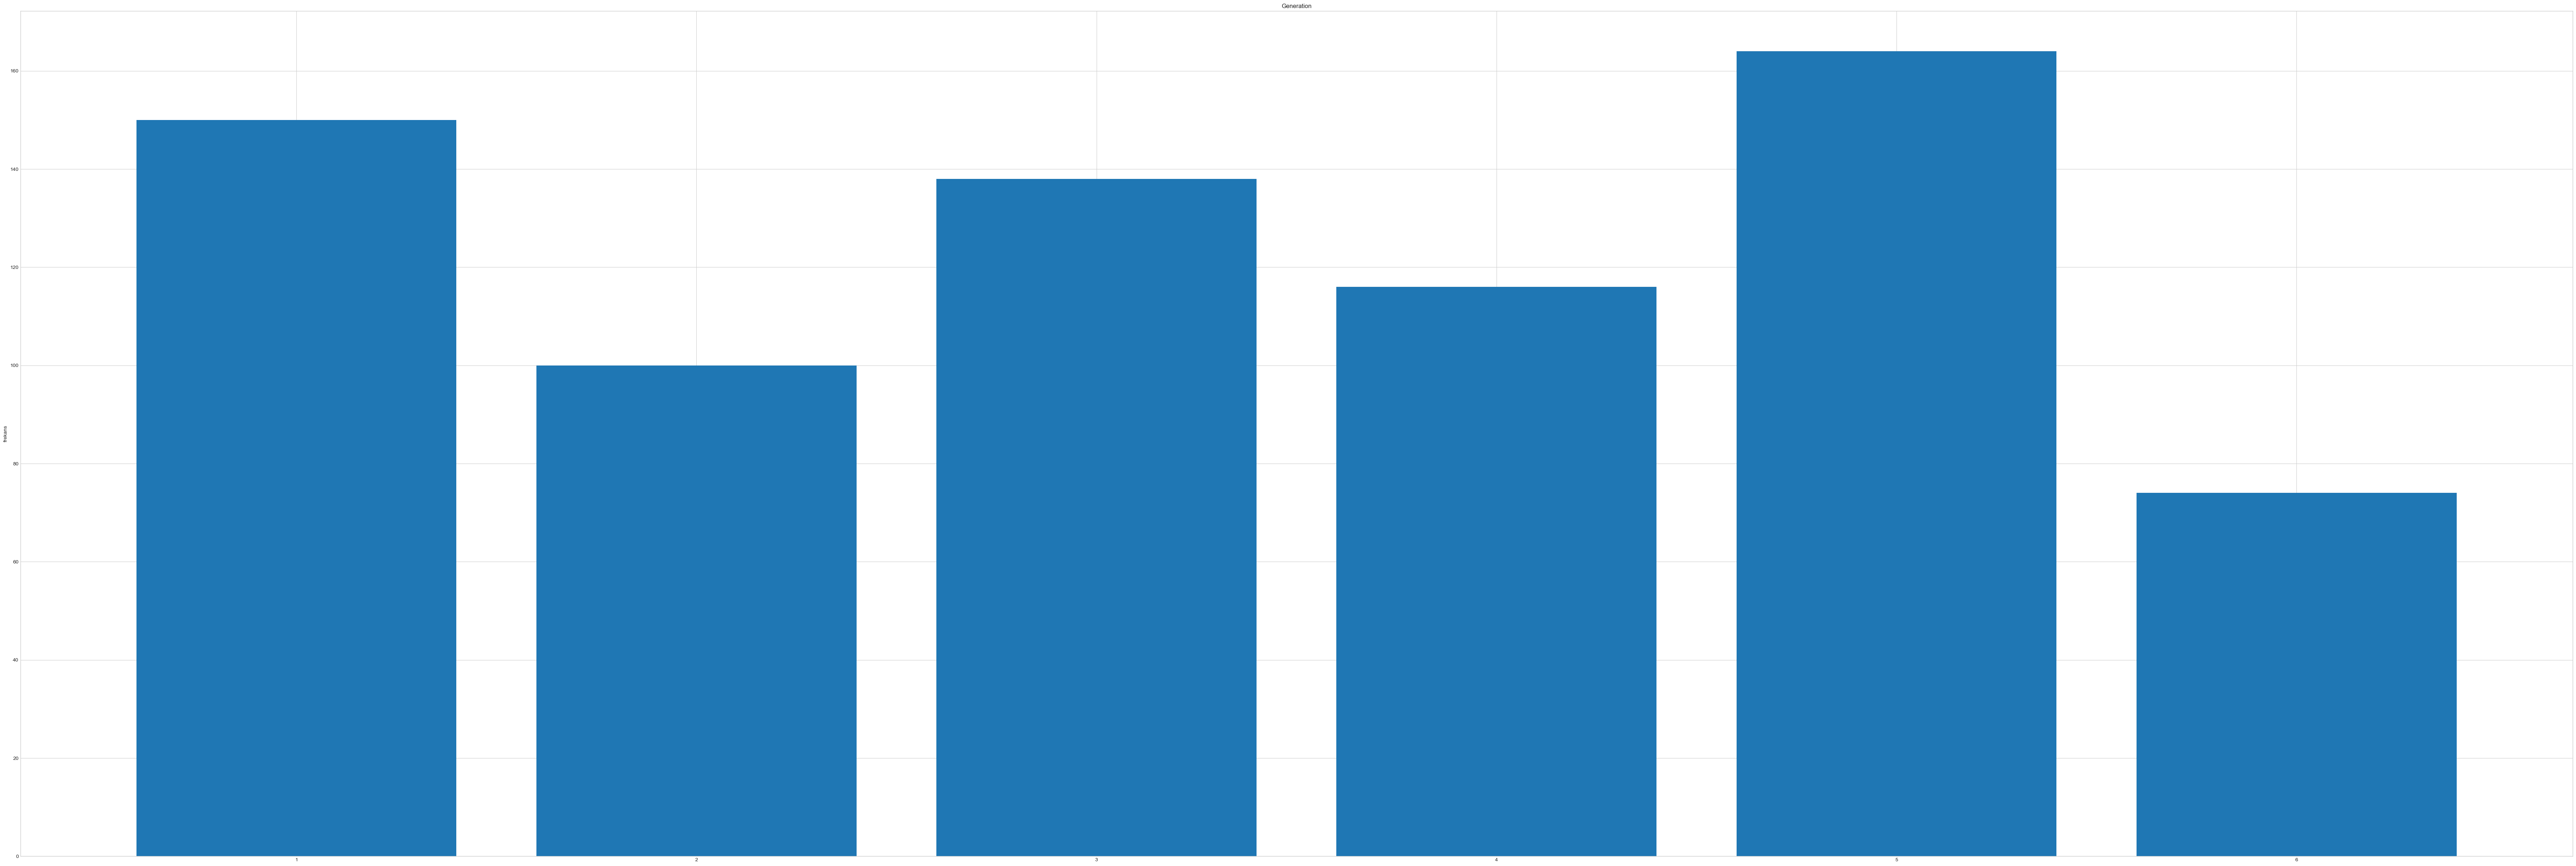

Generation:
5    164
1    150
3    138
4    116
2    100
6     74
Name: Generation, dtype: int64


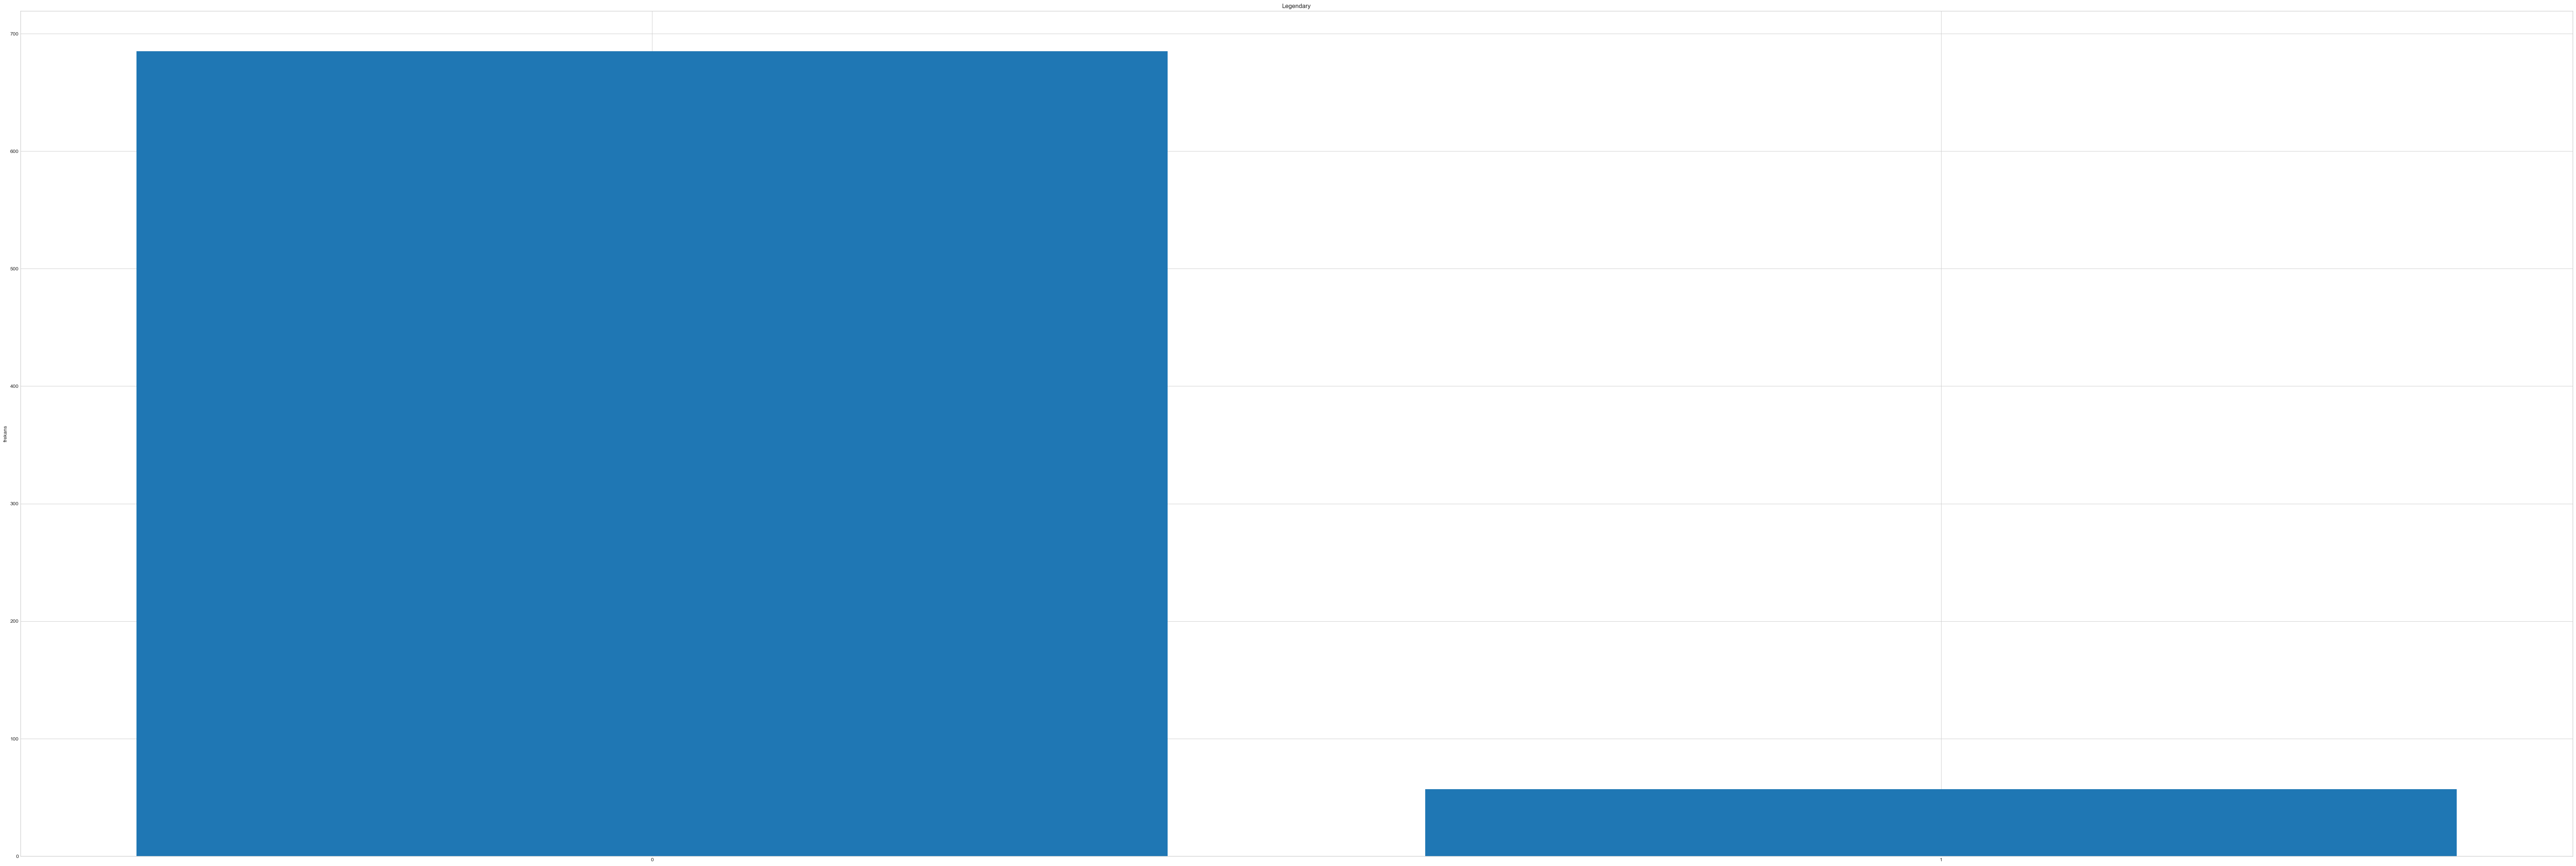

Legendary:
0    685
1     57
Name: Legendary, dtype: int64


In [311]:
def barplot(variable):
    var=df[variable]
    varValue=var.value_counts()
    plt.figure(figsize=(90,30))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("frekans")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))
category1=["HP","Attack","Defense","Sp. Atk","Speed","Generation","Legendary"]
for c in category1:
          barplot(c)

In [312]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Charmander,Fire,0,309,39,52,43,60,50,65,1,0
4,Charmeleon,Fire,0,405,58,64,58,80,65,80,1,0


In [368]:
df["Name"].nunique()

742

In [313]:
df.isnull().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

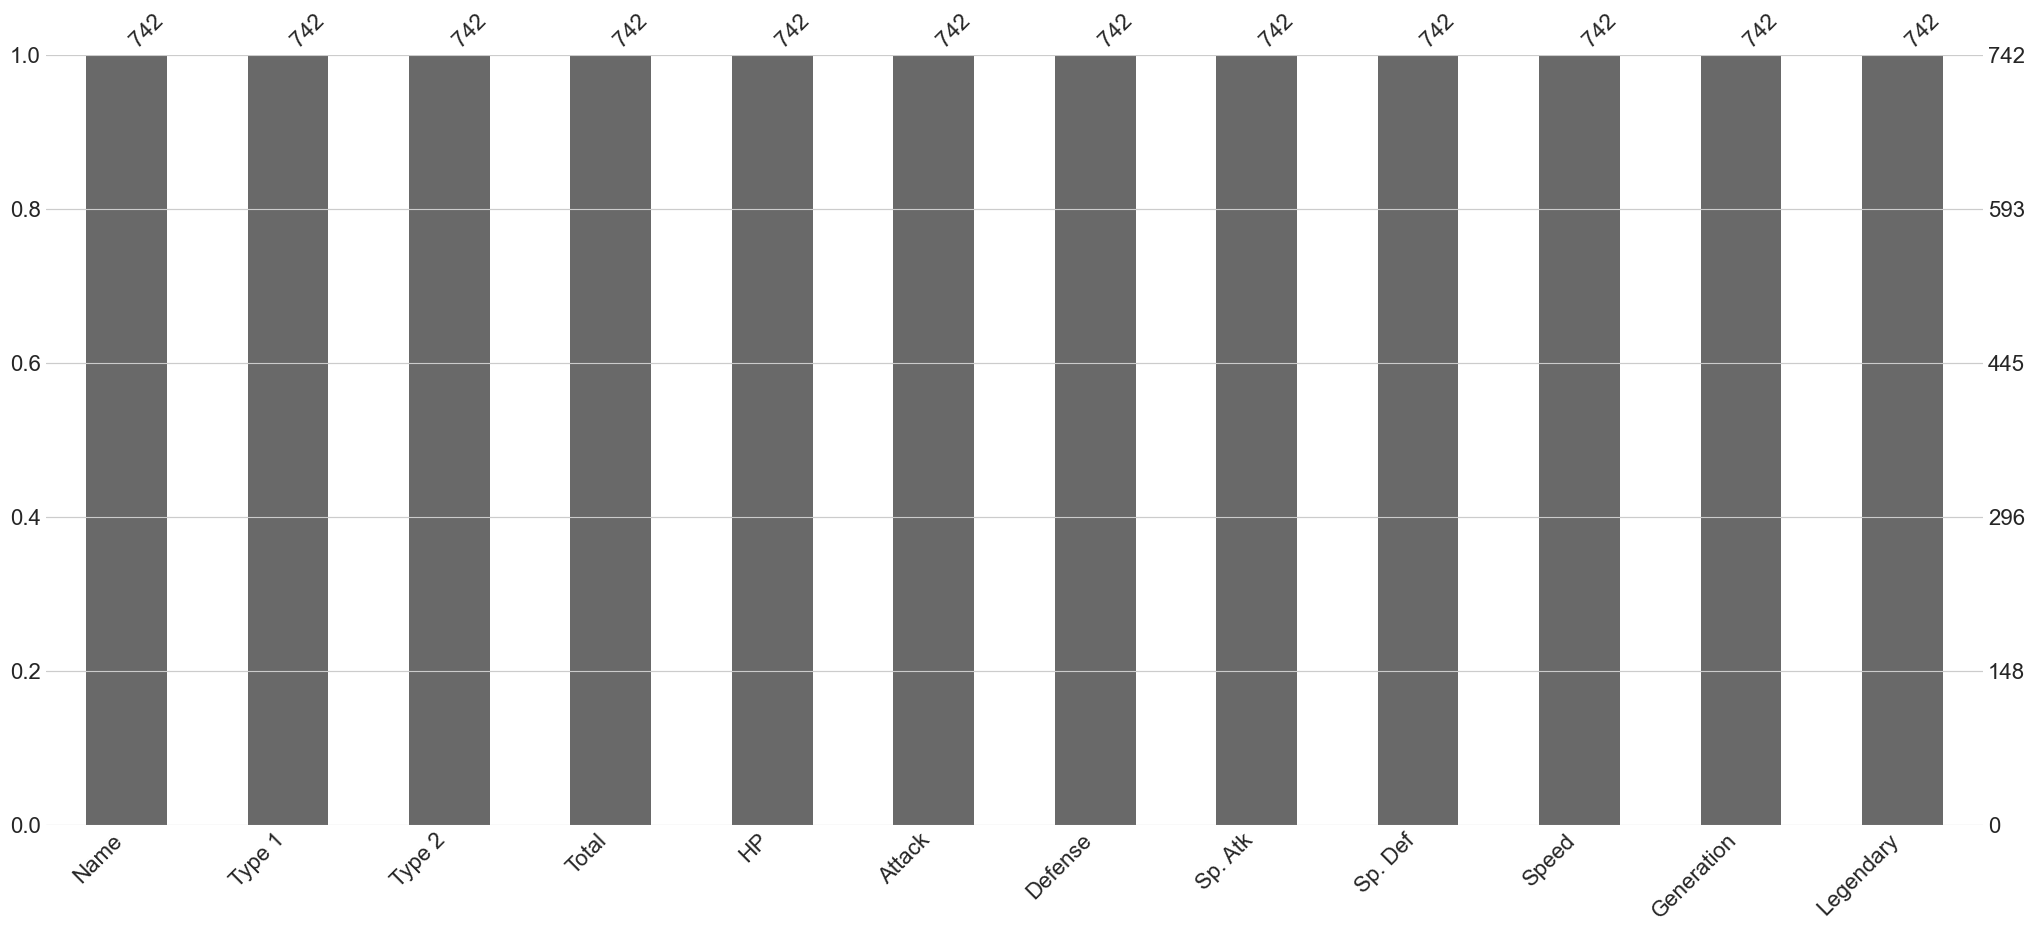

In [314]:
msno.bar(df);

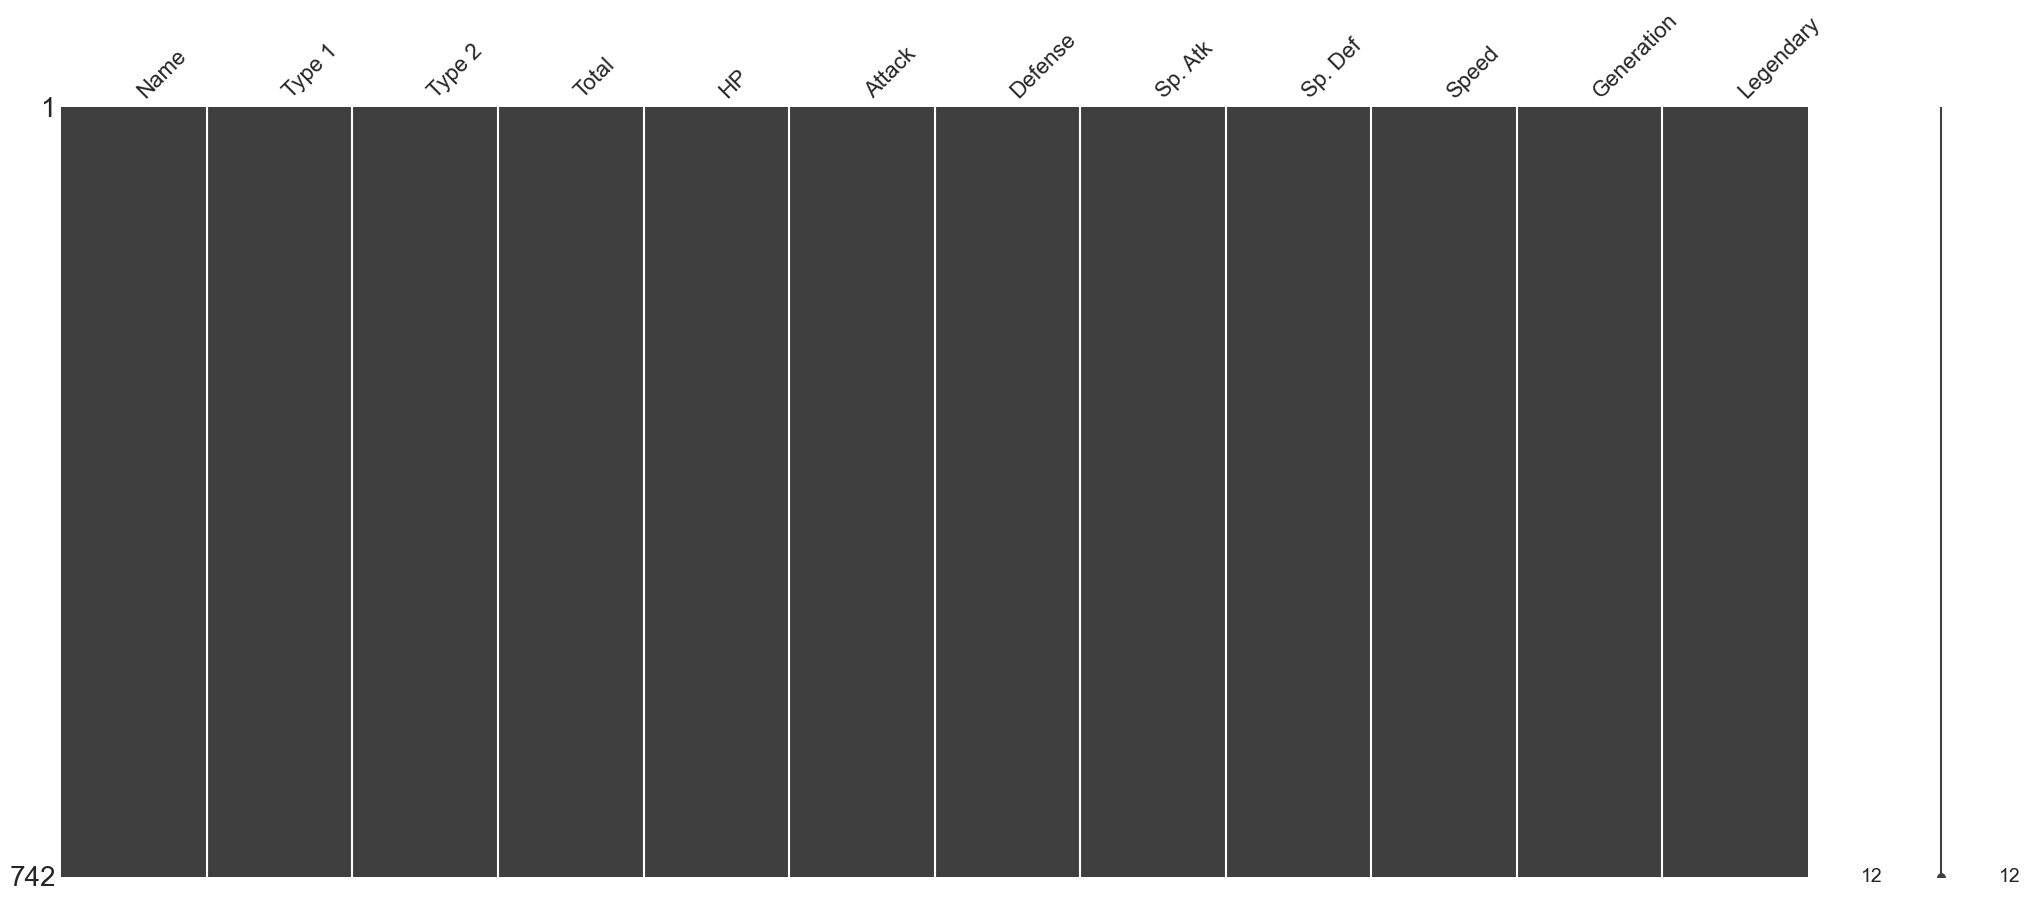

In [315]:
msno.matrix(df);

In [316]:
df['Type 2'].unique()

array(['Poison', 0, 'Flying', 'Ground', 'Fairy', 'Grass', 'Fighting',
       'Psychic', 'Steel', 'Ice', 'Rock', 'Water', 'Electric', 'Fire',
       'Dragon', 'Dark', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [317]:
df.isnull().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [318]:
df["Type 2"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
737    False
738    False
739    False
740    False
741    False
Name: Type 2, Length: 742, dtype: bool

In [319]:
df["Type 2"].fillna(0,inplace=True)

In [320]:
df.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Charmander,Fire,0,309,39,52,43,60,50,65,1,0
4,Charmeleon,Fire,0,405,58,64,58,80,65,80,1,0
5,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,0
6,Squirtle,Water,0,314,44,48,65,50,64,43,1,0
7,Wartortle,Water,0,405,59,63,80,65,80,58,1,0
8,Blastoise,Water,0,530,79,83,100,85,105,78,1,0
9,Caterpie,Bug,0,195,45,30,35,20,20,45,1,0


In [321]:
corr=df.corr()

/var/folders/_b/1x9hj_s15m1c7h3jnj7x41mh0000gn/T/ipykernel_13802/1726683880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


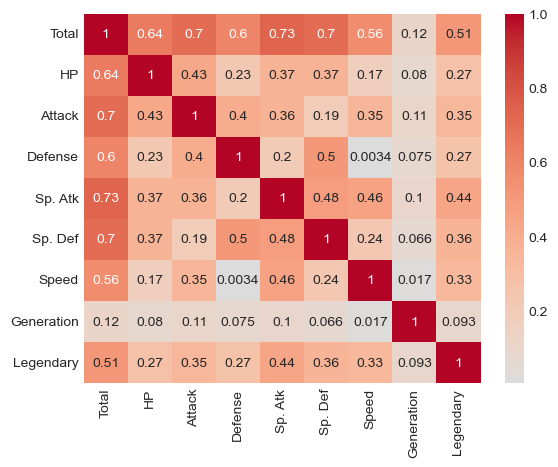

In [322]:
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0);

In [323]:
df["Total"].value_counts()

600    32
405    26
500    23
580    21
300    19
       ..
454     1
244     1
224     1
523     1
514     1
Name: Total, Length: 184, dtype: int64

In [324]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Charmander,Fire,0,309,39,52,43,60,50,65,1,0
4,Charmeleon,Fire,0,405,58,64,58,80,65,80,1,0


In [325]:
unıque_names=df.head()['Name'].unique()

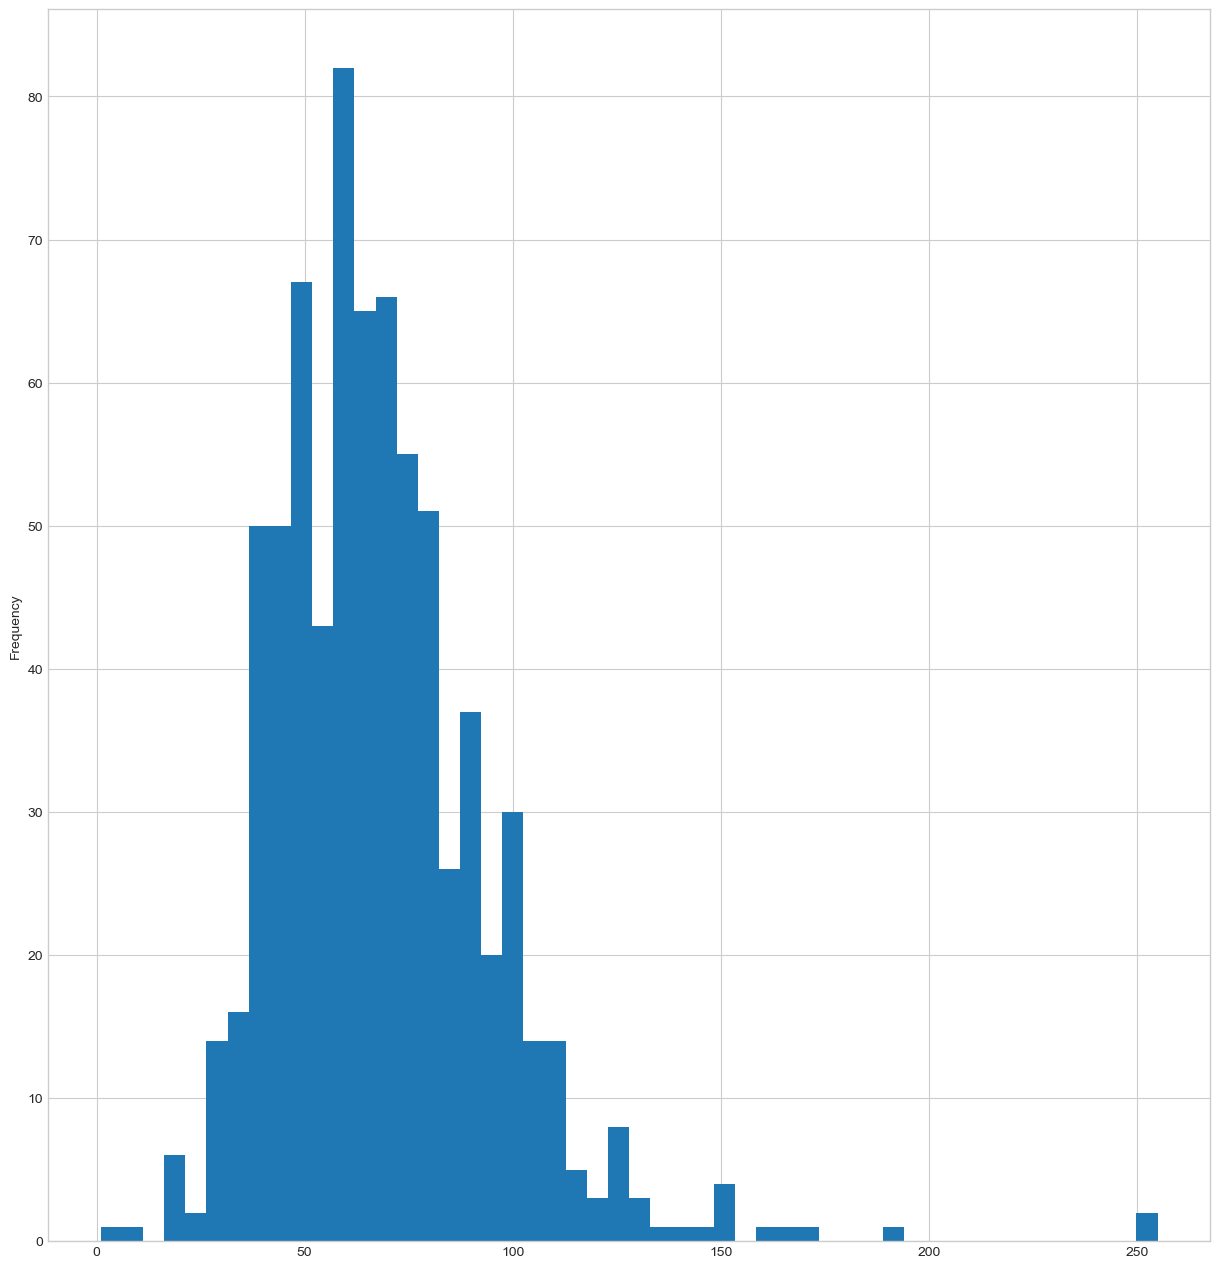

In [326]:
df.HP.plot(kind="hist",x="Name",bins=50,figsize=(15,16));


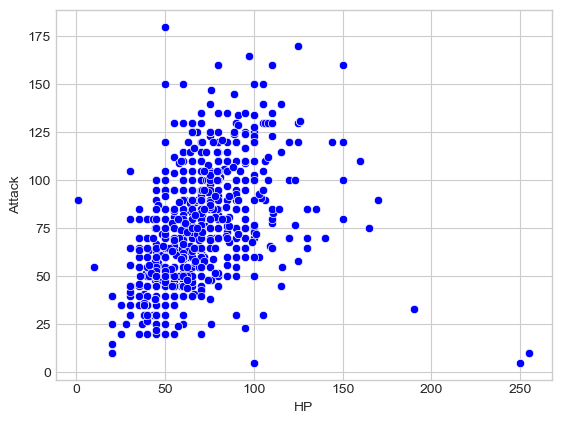

In [327]:
sns.scatterplot(y="Attack",x="HP",data=df,color="b");

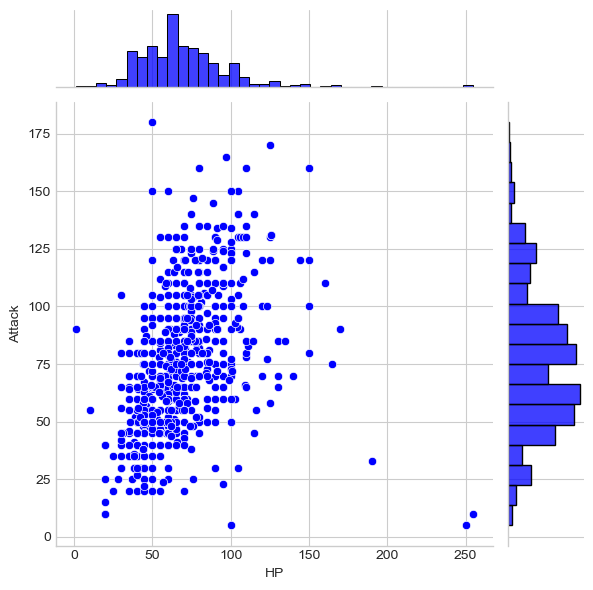

In [328]:
sns.jointplot(y="Attack",x="HP",data=df,color="b");

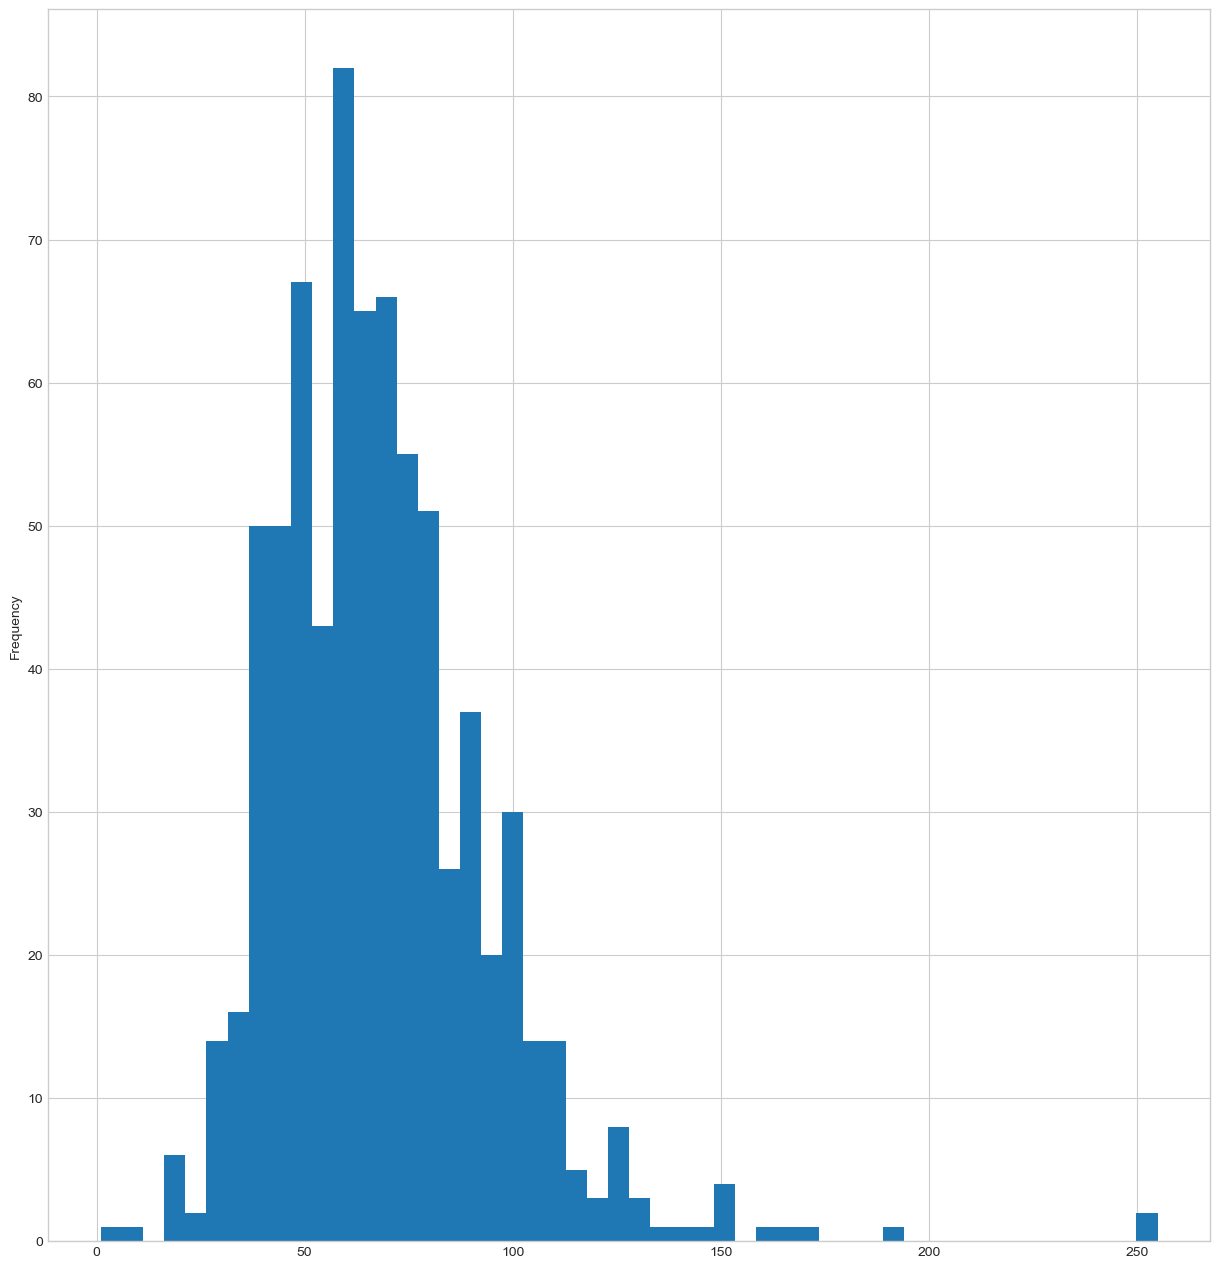

In [329]:
df.HP.plot(kind="hist",bins=50,figsize=(15,16));


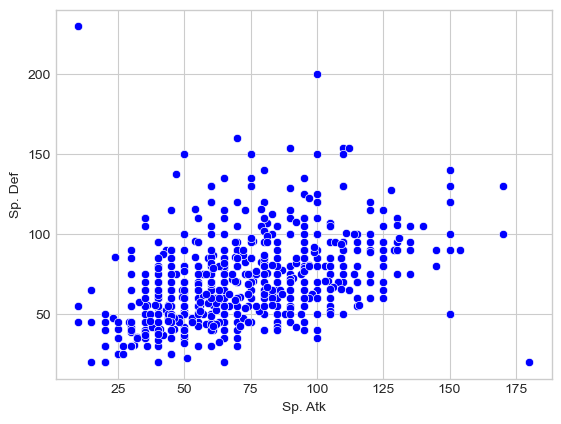

In [330]:
sns.scatterplot(x="Sp. Atk",y="Sp. Def",data=df,color="b");

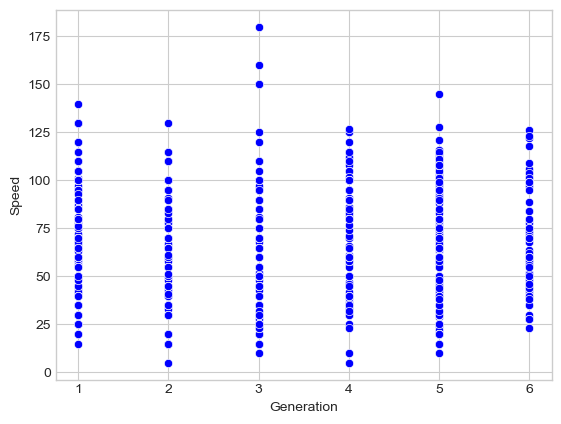

In [331]:
sns.scatterplot(y="Speed",x="Generation",data=df,color="b");

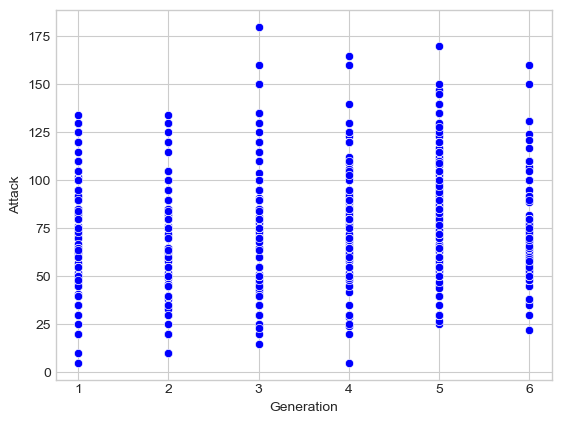

In [332]:
sns.scatterplot(y="Attack",x="Generation",data=df,color="b");

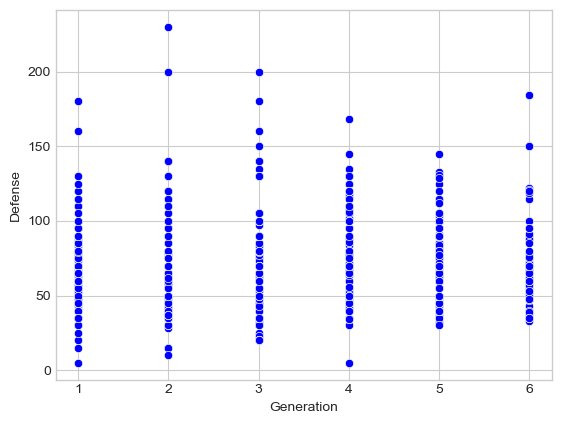

In [333]:
sns.scatterplot(y="Defense",x="Generation",data=df,color="b");

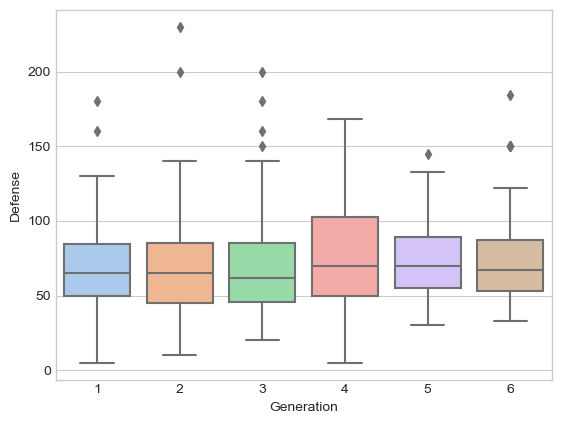

In [340]:
sns.boxplot(y="Defense",x="Generation",data=df,palette="pastel");

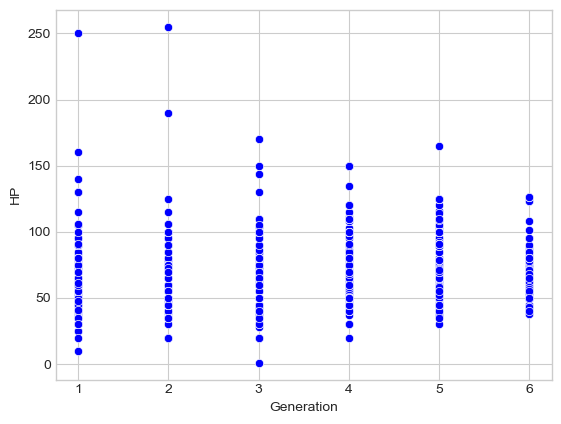

In [334]:
sns.scatterplot(y="HP",x="Generation",data=df,color="b");

In [335]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

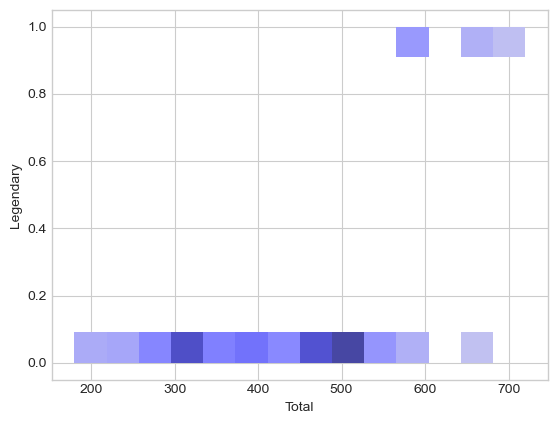

In [336]:
sns.histplot(x="Total",y="Legendary",data=df,color="b");

In [341]:
df.groupby("Generation").mean()

/var/folders/_b/1x9hj_s15m1c7h3jnj7x41mh0000gn/T/ipykernel_13802/1713790163.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Generation").mean()


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Generation,,,,,,,,
1,407.826667,64.440000,72.766667,68.213333,67.120000,66.293333,68.993333,0.026667
2,406.180000,70.580000,68.260000,69.490000,64.300000,72.140000,61.410000,0.050000
3,406.362319,64.963768,74.021739,69.101449,68.485507,66.760870,63.028986,0.094203
4,451.931034,72.775862,79.991379,77.215517,75.293103,76.370690,70.284483,0.112069
5,434.317073,71.597561,82.201220,72.000000,71.939024,68.390244,68.189024,0.091463
6,434.189189,68.945946,74.729730,74.675676,74.905405,75.135135,65.797297,0.094595


In [342]:
df.agg(["mean", "std"])

/var/folders/_b/1x9hj_s15m1c7h3jnj7x41mh0000gn/T/ipykernel_13802/729202529.py:1: FutureWarning: ['Name', 'Type 1', 'Type 2'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(["mean", "std"])


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
mean,422.71159,68.699461,75.803235,71.439353,70.113208,70.088949,66.567385,3.358491,0.076819
std,111.89932,25.979645,29.657225,29.467766,29.979536,27.308952,27.899185,1.660302,0.266484


<Axes: xlabel='Generation', ylabel='Type 1'>

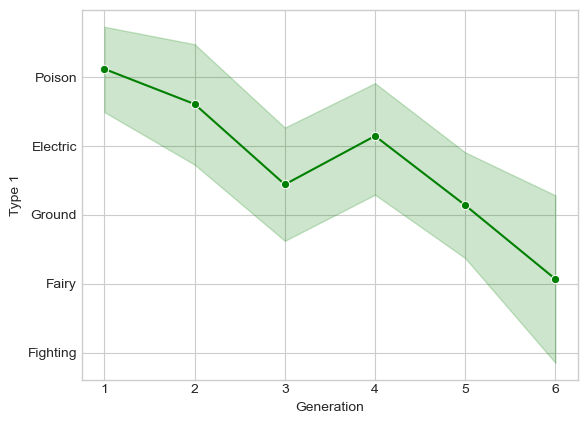

In [343]:
sns.lineplot(df, x="Generation", y="Type 1", marker='o', color='green')

<Axes: xlabel='Type 1', ylabel='Generation'>

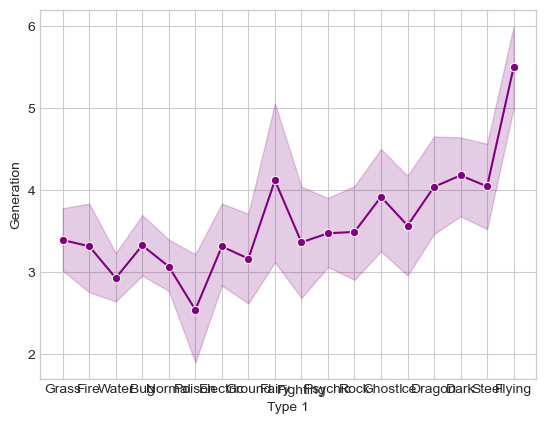

In [344]:
sns.lineplot(df, x="Type 1", y="Generation", marker='o', color='purple')

In [ ]:
## --MAKINE ÖĞRENMESİ--

In [358]:
df["Name"].value_counts()

Bulbasaur    1
Phione       1
Mesprit      1
Azelf        1
Dialga       1
            ..
Celebi       1
Treecko      1
Grovyle      1
Sceptile     1
Volcanion    1
Name: Name, Length: 742, dtype: int64

In [346]:
df["Generation"].value_counts()

5    164
1    150
3    138
4    116
2    100
6     74
Name: Generation, dtype: int64

In [349]:
X=df.drop("Generation",axis=1)
y=df["Generation"]

In [353]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [378]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Name'] = label_encoder.fit_transform(df['Name'])

# Split data
X = df[['Attack', 'Defense', 'Name']]  # Features including 'Name'
y = df['Legendary']

# Rest of your code to split, train, and evaluate the model...


In [379]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9)

In [380]:
model=RandomForestClassifier(random_state=9)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=9)

In [391]:
cam_pred=model.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score

In [392]:
accuracy_score(y_test,cam_pred)


0.9237668161434978

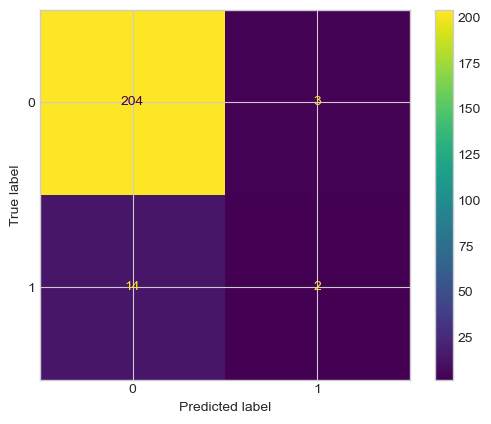

In [394]:
ConfusionMatrixDisplay.from_estimator(model ,X_test,y_test);

In [395]:
print(classification_report(y_test,cam_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       207
           1       0.40      0.12      0.19        16

    accuracy                           0.92       223
   macro avg       0.67      0.56      0.58       223
weighted avg       0.90      0.92      0.90       223

